# EDA

Apziva project #5: ValueInvestor<br>
2023 09 04

__Summary:__
* This notebook describes the task to be solved.

## TOC: <a class="anchor" id="TOC"></a>
* [Utilities](#Utilities)
* [Installation](#Installation)
* [Get main data](#GetMainData)
* [EDA](#EDA)
    * [Distributions of numeric columns](#DistributionsNumericColumns)
    * [Log transformation](#LogTransformation)
    * [Correlating the value columns](#CorrelatingTheValueColumns)
* [Weekdays](#Weekdays) 
* [Time series](#TimeSeries) 

## Utilities <a class="anchor" id="Utilities"></a>
[TOC](#TOC)

In [1]:
# own libraries
import Utilities as u
import MachineLearning as ml

# activate changes in libraries
import importlib
importlib.reload(u)
importlib.reload(ml)

# aliases
from Utilities import TypeChecker as t
from Utilities import PrintAlias as p

## Installation <a class="anchor" id="Installation"></a>
[TOC](#TOC)

In [2]:
# installation
# pip install none-so-far

## Get main data <a class="anchor" id="GetMainData"></a>
[TOC](#TOC)

In [3]:
import pickle
import pandas as pd
strFilename = f"../data/processed/dfrMain.p"
with open(strFilename, 'rb') as objBufferedWriter: # rb = read in binary mode
    dfrMain = pickle.load(objBufferedWriter)
dfrMain.reset_index(inplace=True)   
dfrMain.rename(columns={'index': 'Date'}, inplace=True)
dfrMain['Date'] = pd.to_datetime(dfrMain['Date'])
p(dfrMain.shape)
dfrMain.head()

(9447, 6)


,Date,Open,High,Low,Close,Price
0,1986-03-13,0.055004,0.063093,0.055004,0.060396,0.057700
1,1986-03-14,0.060396,0.063632,0.060396,0.062553,0.061475
2,1986-03-17,0.062553,0.064172,0.062553,0.063632,0.063093
3,1986-03-18,0.063632,0.064172,0.061475,0.062014,0.062823
4,1986-03-19,0.062014,0.062553,0.060396,0.060936,0.061475


## EDA <a class="anchor" id="EDA"></a>
[TOC](#TOC)

### Distributions of numeric columns <a class="anchor" id="DistributionsNumericColumns"></a>
[TOC](#TOC)

DISTRIBUTIONS OF NUMERIC COLUMNS


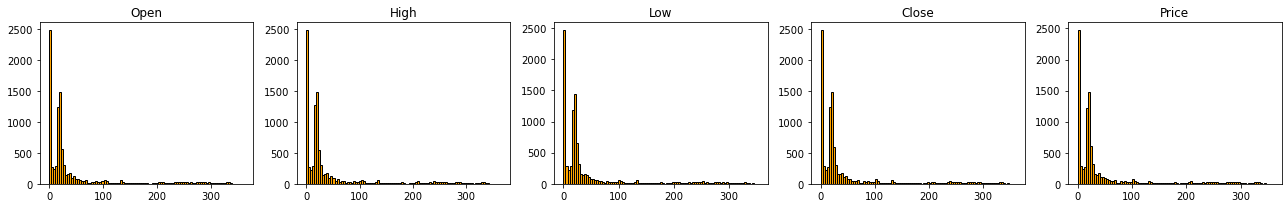

In [4]:
import pandas as pd
lstrNumericColumns = ["Open","High","Low","Close","Price"]
p("Distributions of numeric columns".upper())
ml.DrawDistributionPlots(
    dfrMain,
    lstrNumericColumns,
    intDiagramColumns=len(lstrNumericColumns),
    intBins=-1,
    fltTotalWidth=18,
    fltTotalHeight=3,
)

__Observations__
* All distributions have a strong positive skew.
* This had to be expected as the prices grow over several orders of magnitude.
* It makes sense to continue the rest of the analyses using 

__Comments__
* A substantial proportion of values is 0 or close to 0.
* There may be different magnitudes depending on the country.

### Log transformation <a class="anchor" id="LogTransformation"></a>
[TOC](#TOC)

In [5]:
import numpy as np
dfrLog = dfrMain.copy()
for strColumn in lstrNumericColumns:
    dfrLog[f'Log{strColumn}'] = np.log10(dfrLog[strColumn])
dfrLog    

,Date,Open,High,Low,Close,Price,LogOpen,LogHigh,LogLow,LogClose,LogPrice
0,1986-03-13,0.055004,0.063093,0.055004,0.060396,0.057700,-1.259604,-1.200018,-1.259604,-1.218989,-1.238822
1,1986-03-14,0.060396,0.063632,0.060396,0.062553,0.061475,-1.218988,-1.196322,-1.218988,-1.203749,-1.211302
2,1986-03-17,0.062553,0.064172,0.062553,0.063632,0.063093,-1.203750,-1.192657,-1.203750,-1.196322,-1.200020
3,1986-03-18,0.063632,0.064172,0.061475,0.062014,0.062823,-1.196322,-1.192657,-1.211302,-1.207509,-1.201879
4,1986-03-19,0.062014,0.062553,0.060396,0.060936,0.061475,-1.207509,-1.203749,-1.218988,-1.215128,-1.211302
...,...,...,...,...,...,...,...,...,...,...,...
9442,2023-08-30,328.670013,329.809998,326.450012,328.790009,328.730011,2.516760,2.518264,2.513817,2.516919,2.516839
9443,2023-08-31,329.200012,330.910004,326.779999,327.760010,328.480011,2.517460,2.519710,2.514255,2.515556,2.516509
9444,2023-09-01,331.309998,331.989990,326.779999,328.660004,329.985001,2.520235,2.521125,2.514255,2.516747,2.518494
9445,2023-09-05,329.000000,334.850006,328.660004,333.549988,331.274994,2.517196,2.524850,2.516747,2.523161,2.520189


DISTRIBUTIONS OF NUMERIC COLUMNS


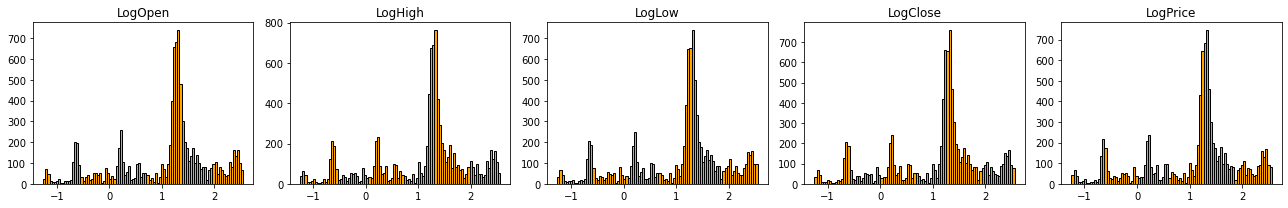

In [6]:
import pandas as pd
lstrLogColumns = ["Log" + column for column in lstrNumericColumns]
p("Distributions of numeric columns".upper())
ml.DrawDistributionPlots(
    dfrLog,
    lstrLogColumns,
    intDiagramColumns=len(lstrNumericColumns),
    intBins=-1,
    fltTotalWidth=18,
    fltTotalHeight=3,
)

__Observation__
* The data is now much less skewed (and negatively skewed now if at all).
* There are about 4 modes:
    * This indicates that the stock market reached 4 plateaus.
    * The plateau around 1.3 is the biggest.

### Correlating the value columns <a class="anchor" id="CorrelatingTheValueColumns"></a>
[TOC](#TOC)

__Definition__
* Columns that refer to the value of a share:
    * i.e. `LogOpen`, `LogHigh`, `LogLow`, `LogClose`,`LogPrice`. 

PAIRWISE CORRELATIONS


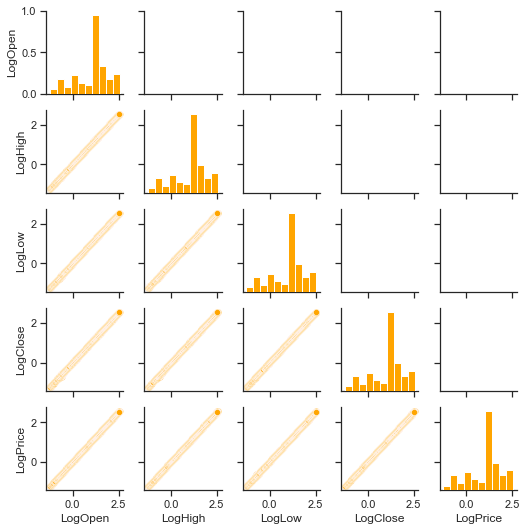

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

p("Pairwise correlations".upper())
sns.set(style="ticks")
g = sns.PairGrid(dfrLog[lstrLogColumns], diag_sharey=True, height=1.5)
g.map_lower(sns.scatterplot, color='orange')
g.map_diag(plt.hist, color='orange', bins=10)
plt.show();

__Observations__
* The 5 price columns are highly correlated.
* This implicitely means that there are probably no outliers.

## Weekdays <a class="anchor" id="Weekdays"></a>
[TOC](#TOC)

In [8]:
dfrLog['Weekday'] = dfrLog['Date'].dt.strftime('%A')  # Use '%a' for abbreviations
u.DataFrameColumnMoved (dfrLog, 'Weekday')
u.ToDisk(dfrLog,strForcedName="dfrLog",strType="processed")
u.DisplayDataFrame(dfrLog.head(3))

,Weekday,Date,Open,High,Low,Close,Price,LogOpen,LogHigh,LogLow,LogClose,LogPrice
0,Thursday,1986-03-13,0.055004,0.063093,0.055004,0.060396,0.057700,-1.259604,-1.200018,-1.259604,-1.218989,-1.238822
1,Friday,1986-03-14,0.060396,0.063632,0.060396,0.062553,0.061475,-1.218988,-1.196322,-1.218988,-1.203749,-1.211302
2,Monday,1986-03-17,0.062553,0.064172,0.062553,0.063632,0.063093,-1.203750,-1.192657,-1.203750,-1.196322,-1.200020


In [9]:
# count the records for each weekday
srsWeekdayCounts = dfrLog['Weekday'].value_counts()
lstrOrderedWeekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
srsWeekdayCounts = srsWeekdayCounts.reindex(lstrOrderedWeekdays, fill_value=0)
pd.DataFrame(srsWeekdayCounts)

,Weekday
Monday,1781
Tuesday,1937
Wednesday,1938
Thursday,1903
Friday,1888
Saturday,0
Sunday,0


__Observations__
* There are no deals on Saturdays and Sundays.
* The other weekdays have similar counts.
    * Differences may result from holidays, which are more often on Mondays and Fridays.

## Time series <a class="anchor" id="TimeSeries"></a>
[TOC](#TOC)

In [10]:
import matplotlib.pyplot as plt
from datetime import datetime

def PlotTimeSeries(dstrColors,blnLastYearOnly=False):

    cintLastTrainingYear = 2022

    # define
    if blnLastYearOnly:
        dfrTraining = dfrLog[dfrLog['Date'].dt.year == cintLastTrainingYear]
        strTitle = f'Training data {cintLastTrainingYear} only'
        strEarliestDate = f"{cintLastTrainingYear}-01-01"
        objEarliestDate = datetime.strptime(strEarliestDate, '%Y-%m-%d')       
    else:
        dfrTraining = dfrLog[dfrLog['Date'].dt.year <= cintLastTrainingYear]
        strTitle = f'Training data until {cintLastTrainingYear}'
        objEarliestDate = dfrLog['Date'].min()

    # series for the scatter plot
    srsX = dfrTraining['Date']

    # scatter plot
    plt.figure(figsize=(20, 4))  # Adjust the figure size as needed
    for strColumn, strColor in dstrColors.items(): 
        plt.plot(srsX, dfrTraining[strColumn], color=strColor,  label=strColumn)

    # customize
    plt.title(strTitle)
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.xlim(objEarliestDate, pd.to_datetime(f'{cintLastTrainingYear}-12-31'))
    plt.legend()
    plt.grid(True)

    # finalize
    plt.show()     

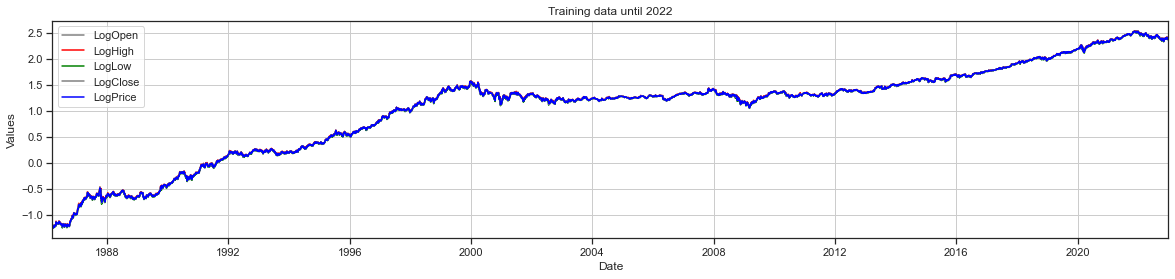

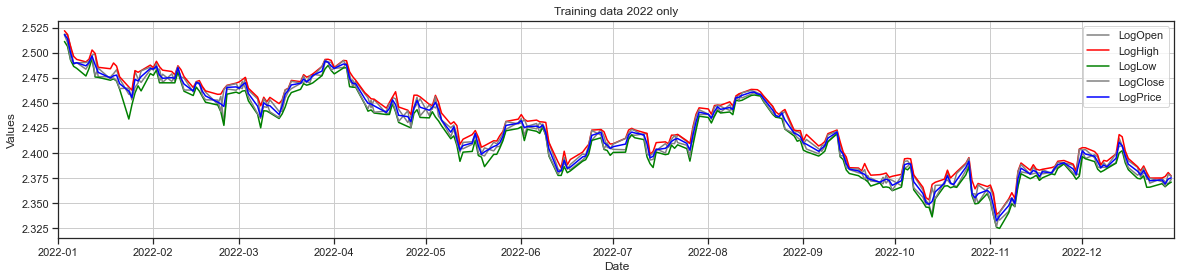

In [11]:
# define y columns:
# - names 
# - colors
dstrColors = {"LogOpen":'gray',"LogHigh":'red',"LogLow":'green',"LogClose":'gray',"LogPrice":'blue'}   
PlotTimeSeries(dstrColors,blnLastYearOnly=False)
PlotTimeSeries(dstrColors,blnLastYearOnly=True)

__Observations__
* The 5 values are close together.
* Over the decades there is an __upwards trend__.
* There was a relatively stable __plateau from 2000 to 2012__.